In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Data Preprocessing and Merging for Retail Forecasting
# 1. Load datasets
transactions = pd.read_csv(r'D:\sandesh imp\project\Real time retail forecasting dashboard\store-sales-time-series-forecasting\transactions.csv')
stores = pd.read_csv(r'D:\sandesh imp\project\Real time retail forecasting dashboard\store-sales-time-series-forecasting\stores.csv')
holidays = pd.read_csv(r'D:\sandesh imp\project\Real time retail forecasting dashboard\store-sales-time-series-forecasting\holidays_events.csv')
oil = pd.read_csv(r'D:\sandesh imp\project\Real time retail forecasting dashboard\store-sales-time-series-forecasting\oil.csv')

# 2. Merge with store metadata
df = transactions.merge(stores, on='store_nbr', how='left')


In [4]:
df.head()

,date,store_nbr,transactions,city,state,type,cluster
0,2013-01-01,25,770,Salinas,Santa Elena,D,1
1,2013-01-02,1,2111,Quito,Pichincha,D,13
2,2013-01-02,2,2358,Quito,Pichincha,D,13
3,2013-01-02,3,3487,Quito,Pichincha,D,8
4,2013-01-02,4,1922,Quito,Pichincha,D,9


In [5]:

# 3. Merge with holiday/events by date
df = df.merge(holidays, on='date', how='left')

# 4. Merge with oil prices by date
df = df.merge(oil, on='date', how='left')

In [6]:
df.head(100)

,date,store_nbr,transactions,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico
0,2013-01-01,25,770,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,2013-01-02,1,2111,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,93.14
2,2013-01-02,2,2358,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,93.14
3,2013-01-02,3,3487,Quito,Pichincha,D,8,NaN,NaN,NaN,NaN,NaN,93.14
4,2013-01-02,4,1922,Quito,Pichincha,D,9,NaN,NaN,NaN,NaN,NaN,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2013-01-04,3,3188,Quito,Pichincha,D,8,NaN,NaN,NaN,NaN,NaN,93.12
96,2013-01-04,4,1596,Quito,Pichincha,D,9,NaN,NaN,NaN,NaN,NaN,93.12
97,2013-01-04,5,1642,Santo Domingo,Santo Domingo de los Tsachilas,D,4,NaN,NaN,NaN,NaN,NaN,93.12
98,2013-01-04,6,1679,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,93.12


In [7]:
#df.to_csv(r'D:\sandesh imp\project\Real time retail forecasting dashboard\store-sales-time-series-forecasting\merged_data.csv', index=True)

In [8]:
# Check data types and missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85007 entries, 0 to 85006
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          85007 non-null  object 
 1   store_nbr     85007 non-null  int64  
 2   transactions  85007 non-null  int64  
 3   city          85007 non-null  object 
 4   state         85007 non-null  object 
 5   type_x        85007 non-null  object 
 6   cluster       85007 non-null  int64  
 7   type_y        13911 non-null  object 
 8   locale        13911 non-null  object 
 9   locale_name   13911 non-null  object 
 10  description   13911 non-null  object 
 11  transferred   13911 non-null  object 
 12  dcoilwtico    58585 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 8.4+ MB
None
date                0
store_nbr           0
transactions        0
city                0
state               0
type_x              0
cluster             0
type_y          71096
loc

In [9]:
df['date']= pd.to_datetime(df['date'])

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85007 entries, 0 to 85006
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          85007 non-null  datetime64[ns]
 1   store_nbr     85007 non-null  int64         
 2   transactions  85007 non-null  int64         
 3   city          85007 non-null  object        
 4   state         85007 non-null  object        
 5   type_x        85007 non-null  object        
 6   cluster       85007 non-null  int64         
 7   type_y        13911 non-null  object        
 8   locale        13911 non-null  object        
 9   locale_name   13911 non-null  object        
 10  description   13911 non-null  object        
 11  transferred   13911 non-null  object        
 12  dcoilwtico    58585 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 8.4+ MB
None


In [11]:
# Fill oil prices using the new method (no deprecation warning)
df['dcoilwtico'] = df['dcoilwtico'].ffill()

# Create binary holiday indicator
df['is_holiday'] = df['type_y'].notna()
df['is_holiday'] = df['is_holiday'].astype(int)

# Fill holiday-related columns with appropriate defaults
df['locale'] = df['locale'].fillna('None')
df['description'] = df['description'].fillna('Regular Day')

# Time-based features
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Store type clarification (rename type_x to store_type)
df = df.rename(columns={'type_x': 'store_type'})

# Verify changes
print("Data types after conversion:")
print(df.dtypes)
print(f"\nMissing values after filling:")
print(df.isnull().sum())

Data types after conversion:
date            datetime64[ns]
store_nbr                int64
transactions             int64
city                    object
state                   object
store_type              object
cluster                  int64
type_y                  object
locale                  object
locale_name             object
description             object
transferred             object
dcoilwtico             float64
is_holiday               int64
day_of_week              int32
month                    int32
quarter                  int32
is_weekend               int64
dtype: object

Missing values after filling:
date                0
store_nbr           0
transactions        0
city                0
state               0
store_type          0
cluster             0
type_y          71096
locale              0
locale_name     71096
description         0
transferred     71096
dcoilwtico          1
is_holiday          0
day_of_week         0
month               0
quarter         

In [12]:
#df.to_csv(r'D:\sandesh imp\project\Real time retail forecasting dashboard\store-sales-time-series-forecasting\final_data.csv', index=True)

Now the datset is ready lets do the eda for it to get the insights

In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85007 entries, 0 to 85006
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          85007 non-null  datetime64[ns]
 1   store_nbr     85007 non-null  int64         
 2   transactions  85007 non-null  int64         
 3   city          85007 non-null  object        
 4   state         85007 non-null  object        
 5   store_type    85007 non-null  object        
 6   cluster       85007 non-null  int64         
 7   type_y        13911 non-null  object        
 8   locale        85007 non-null  object        
 9   locale_name   13911 non-null  object        
 10  description   85007 non-null  object        
 11  transferred   13911 non-null  object        
 12  dcoilwtico    85006 non-null  float64       
 13  is_holiday    85007 non-null  int64         
 14  day_of_week   85007 non-null  int32         
 15  month         85007 non-null  int32 

In [14]:
df.head()
df.tail()

,date,store_nbr,transactions,city,state,store_type,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico,is_holiday,day_of_week,month,quarter,is_weekend
85002,2017-08-15,50,2804,Ambato,Tungurahua,A,14,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,1,1,8,3,0
85003,2017-08-15,51,1573,Guayaquil,Guayas,A,17,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,1,1,8,3,0
85004,2017-08-15,52,2255,Manta,Manabi,A,11,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,1,1,8,3,0
85005,2017-08-15,53,932,Manta,Manabi,D,13,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,1,1,8,3,0
85006,2017-08-15,54,802,El Carmen,Manabi,C,3,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,1,1,8,3,0


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
print(df.describe())

                                date     store_nbr  transactions  \
count                          85007  85007.000000  85007.000000   
mean   2015-05-22 20:17:18.577999360     26.940617   1697.071441   
min              2013-01-01 00:00:00      1.000000      5.000000   
25%              2014-03-30 00:00:00     13.000000   1046.000000   
50%              2015-06-13 00:00:00     27.000000   1395.000000   
75%              2016-07-14 00:00:00     40.000000   2081.000000   
max              2017-08-15 00:00:00     54.000000   8359.000000   
std                              NaN     15.607799    966.837167   

            cluster    dcoilwtico    is_holiday   day_of_week         month  \
count  85007.000000  85006.000000  85007.000000  85007.000000  85007.000000   
mean       8.533815     66.591304      0.163645      3.008046      6.255167   
min        1.000000     26.190000      0.000000      0.000000      1.000000   
25%        4.000000     46.020000      0.000000      1.000000      3.00

In [17]:
print(df['store_type'].value_counts())

store_type
D    29070
C    24454
A    13777
B    11823
E     5883
Name: count, dtype: int64


In [18]:
print(df['city'].value_counts())

city
Quito            29822
Guayaquil        12718
Santo Domingo     4178
Cuenca            4152
Ambato            3414
Machala           3414
Latacunga         3352
Quevedo           1708
Babahoyo          1708
Loja              1708
Daule             1707
Playas            1706
Cayambe           1706
Ibarra            1706
Guaranda          1706
El Carmen         1706
Esmeraldas        1702
Riobamba          1668
Salinas           1645
Libertad          1581
Manta             1313
Puyo               687
Name: count, dtype: int64


Missing Value Heatmap

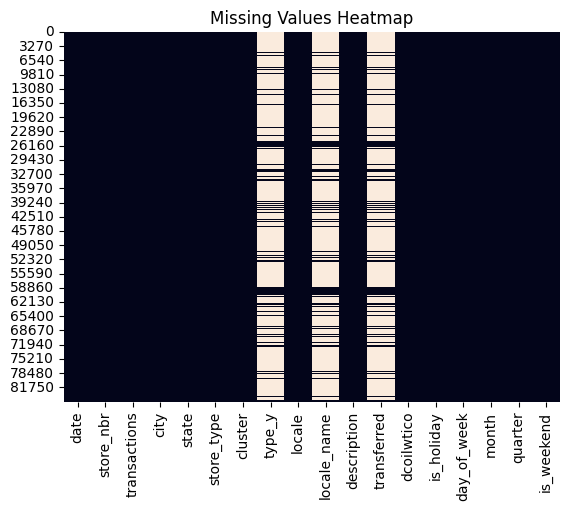

In [19]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

Time Series Trends
Purpose: Identify overall sales trends, spikes, and seasonality.

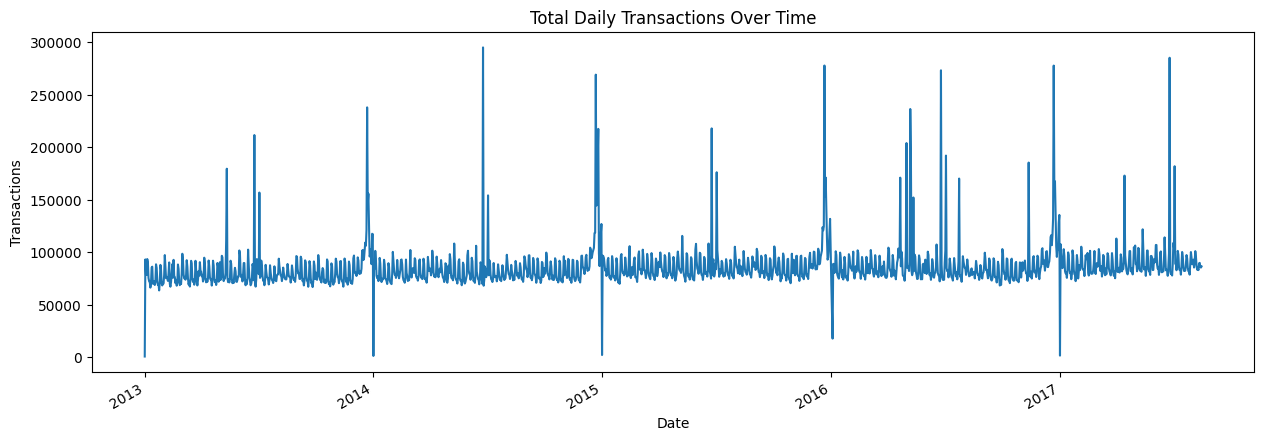

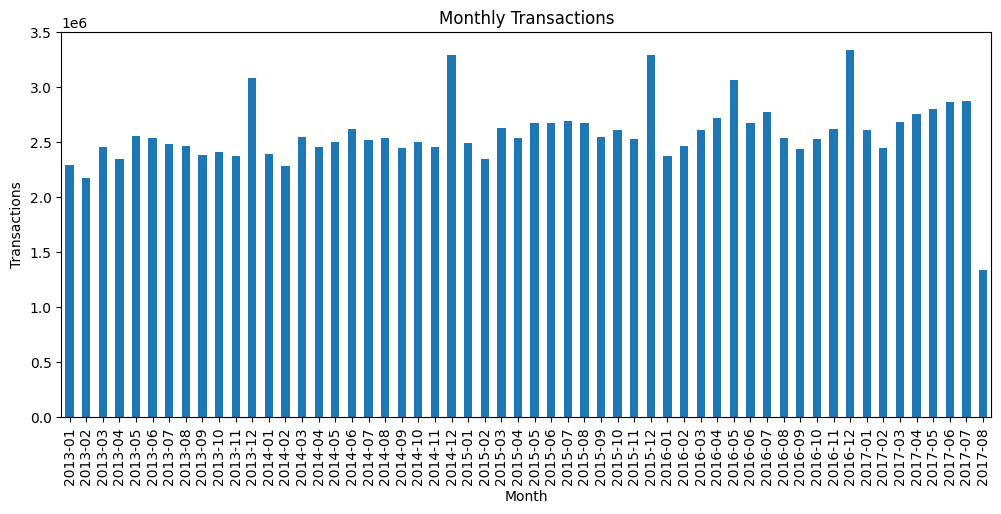

In [20]:
# Transactions over time
plt.figure(figsize=(15, 5))
df.groupby('date')['transactions'].sum().plot()
plt.title('Total Daily Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.show()

# Zoom in: monthly aggregated
monthly = df.groupby(df['date'].dt.to_period('M'))['transactions'].sum()
monthly.plot(kind='bar', figsize=(12,5))
plt.title('Monthly Transactions')
plt.ylabel('Transactions')
plt.xlabel('Month')
plt.show()


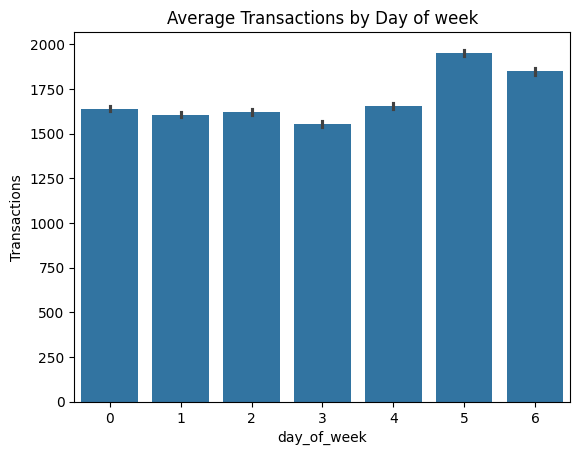

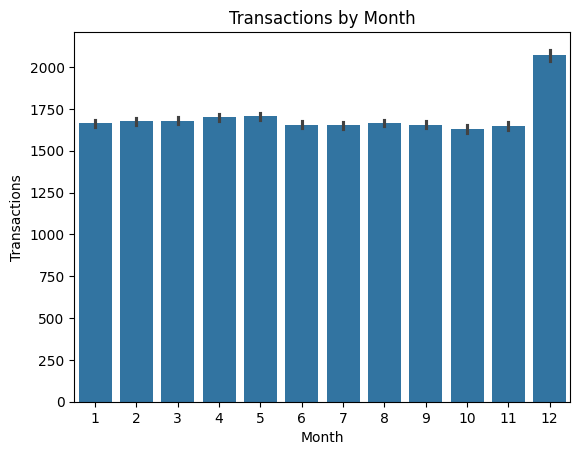

In [21]:
# Transactions by day of the week
sns.barplot(x='day_of_week', y='transactions', data=df)
plt.title('Average Transactions by Day of week')
plt.xlabel('day_of_week')
plt.ylabel('Transactions')
plt.show()

#transacation by month 
sns.barplot(x='month', y='transactions', data=df)
plt.title('Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Transactions')
plt.show()

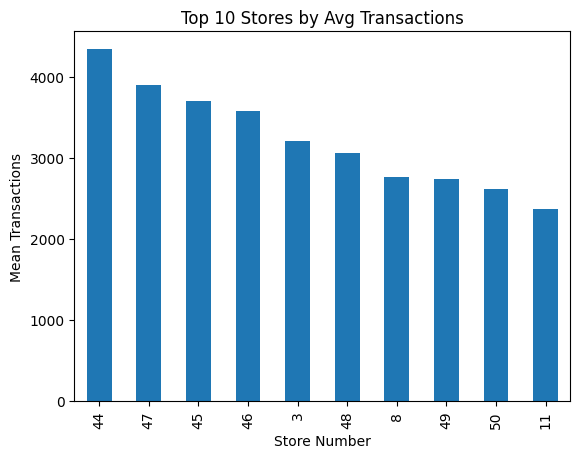

In [22]:
# Average transactions per store
top_stores = df.groupby('store_nbr')['transactions'].mean().sort_values(ascending=False).head(10)
top_stores.plot(kind='bar')
plt.title('Top 10 Stores by Avg Transactions')
plt.ylabel('Mean Transactions')
plt.xlabel('Store Number')
plt.show()

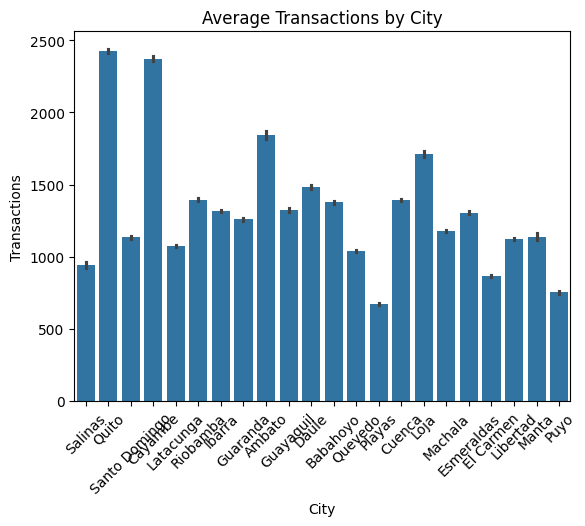

In [23]:
sns.barplot(x='city', y='transactions', data=df)
plt.title('Average Transactions by City')
plt.xlabel('City')  
plt.ylabel('Transactions')
plt.xticks(rotation=45)
plt.show()

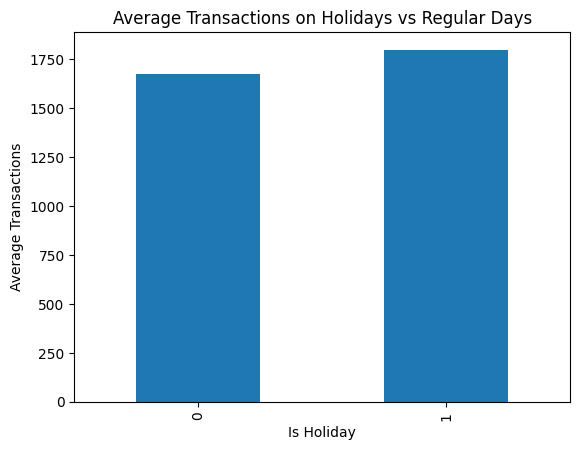

In [24]:
avg_by_holiday = df.groupby('is_holiday')['transactions'].mean()
avg_by_holiday.plot(kind='bar')
plt.title('Average Transactions on Holidays vs Regular Days')
plt.xlabel('Is Holiday')
plt.ylabel('Average Transactions')
plt.show()

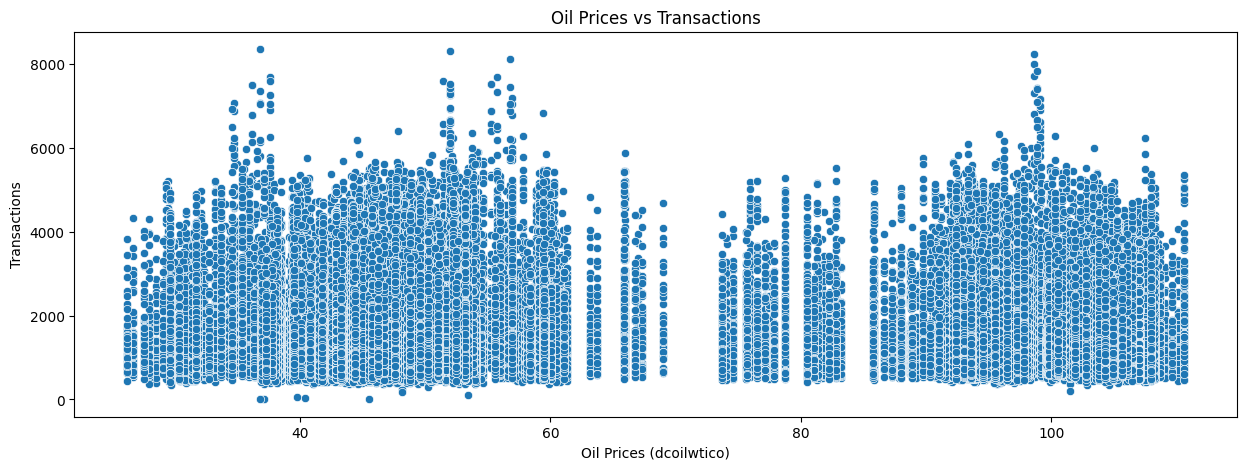

In [25]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='dcoilwtico', y='transactions', data=df)
plt.title('Oil Prices vs Transactions')
plt.xlabel('Oil Prices (dcoilwtico)')
plt.ylabel('Transactions')
plt.show()

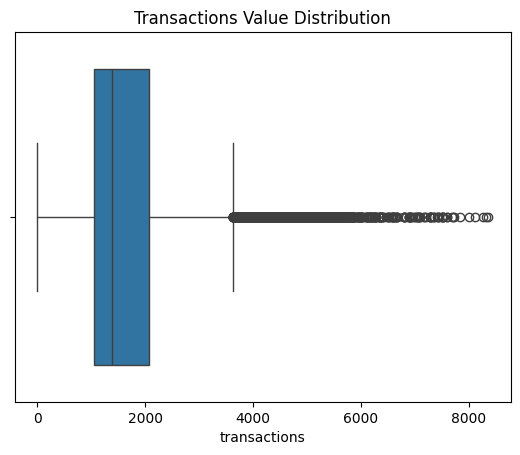

In [26]:
sns.boxplot(x=df['transactions'])
plt.title('Transactions Value Distribution')
plt.show()


In [27]:
Q1 = df['transactions'].quantile(0.25)
Q3 = df['transactions'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['transactions'] >= lower_bound) & (df['transactions'] <= upper_bound)]
print(f'Rows before: {len(df)}, Rows after: {len(df_filtered)}')
df_filtered.to_csv(r'D:\sandesh imp\project\Real time retail forecasting dashboard\store-sales-time-series-forecasting\filtered_data.csv', index=False)

Rows before: 85007, Rows after: 80331


now we have filtered data without outliers

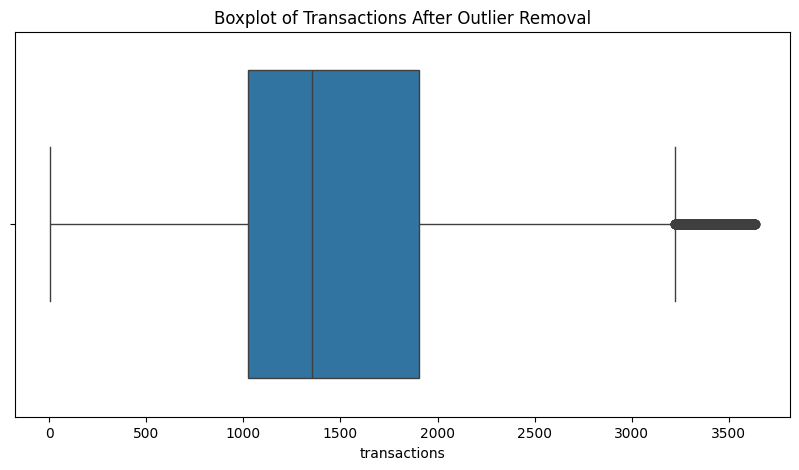

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_filtered['transactions'])
plt.title('Boxplot of Transactions After Outlier Removal')
plt.show()